<a href="https://colab.research.google.com/github/johntronik/beyes-file/blob/master/gaussian_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import

In [1]:
!pip install japanize_matplotlib
import japanize_matplotlib
import numpy as np
np.set_printoptions(suppress=True, precision=4)
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=8d047f29115b5d3d27e34c635c886d9ae043fbd9628ec355c596bf9240f9088a
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


### 3.2.4 ガウス過程からのサンプル

In [132]:
# (3.26)
def gaussian_kernel(x,x_,theta1=1,theta2=1):
    return theta1*np.exp(-abs(x-x_)**2/theta2)
# (3.27)
X = np.array([1,2,3,4])
np.array([[gaussian_kernel(x,x_) for x_ in X] for x in X])

array([[1.    , 0.3679, 0.0183, 0.0001],
       [0.3679, 1.    , 0.3679, 0.0183],
       [0.0183, 0.3679, 1.    , 0.3679],
       [0.0001, 0.0183, 0.3679, 1.    ]])

図3.6 1次元RBFカーネルの様子

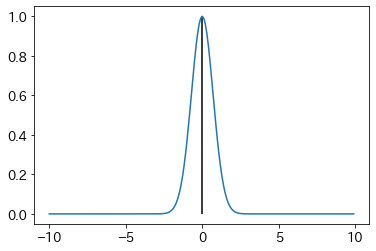

In [3]:
x = np.arange(-10,10,0.1)
x_ = 0
y = gaussian_kernel(x,x_)
plt.plot(x,y)
plt.vlines(x_,0,1);

図3.7 RBFカーネルを用いたガウス過程からのサンプル

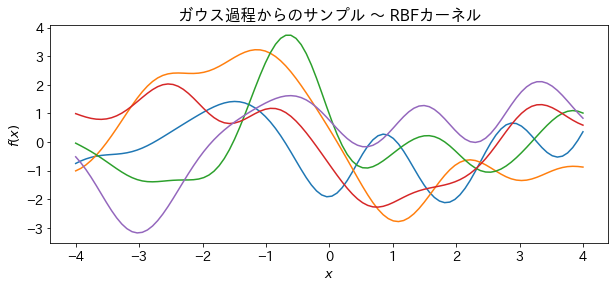

In [4]:
n_samples = 100
number_of_functions = 5

X = np.linspace(-4, 4, n_samples)
sigma = np.array([[gaussian_kernel(x,x_,theta1=2) for x_ in X] for x in X])
ys = np.random.multivariate_normal(mean=np.zeros(n_samples), cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ RBFカーネル');

図3.8 高次元のガウス分布からのサンプルと共分散行列

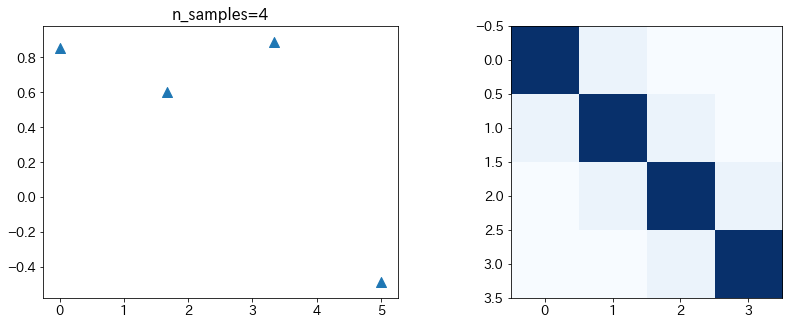

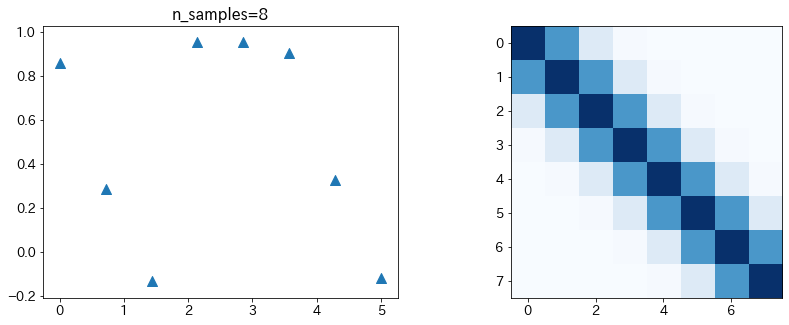

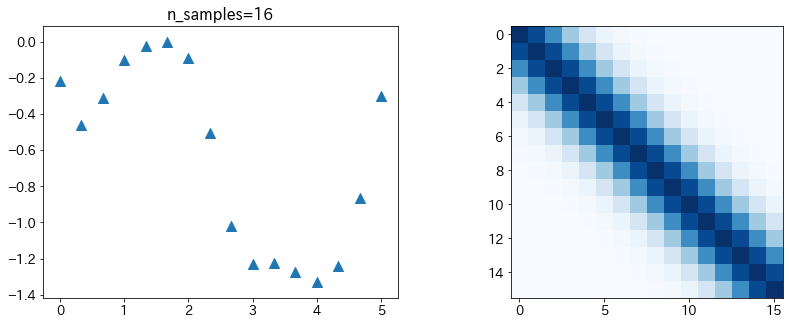

In [5]:
def plot_3_8(n_samples):
    X = np.linspace(0, 5, n_samples)
    sigma = np.array([[gaussian_kernel(x,x_) for x_ in X] for x in X])
    ys = np.random.multivariate_normal(mean=np.zeros(n_samples), cov=sigma)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
    ax1.scatter(X, ys,marker='^',s=100);ax1.set_title('n_samples={}'.format(n_samples))
    ax2.imshow(sigma,cmap='Blues')

plot_3_8(4);plot_3_8(8);plot_3_8(16);

3.9 3Dプロットよくわからない

### 3.3.2 様々なカーネル 図3.11

In [0]:
def deco(kernel):
    def wrapper(X,X_,**kwargs):
        return np.array([[kernel(x,x_,**kwargs) for x_ in X_] for x in X])
    return wrapper

@deco
def linear_kernel(x,x_):
    return x*x_
@deco
def exponential_kernel(x,x_,theta=1):
    return np.exp(-abs(x-x_)/theta)
@deco
def periodic_kernel(x,x_,theta1=1,theta2=1):
    return np.exp(theta1*np.cos(abs(x-x_)/theta2))

n_samples = 100
number_of_functions = 4
X = np.linspace(-4, 4, n_samples)

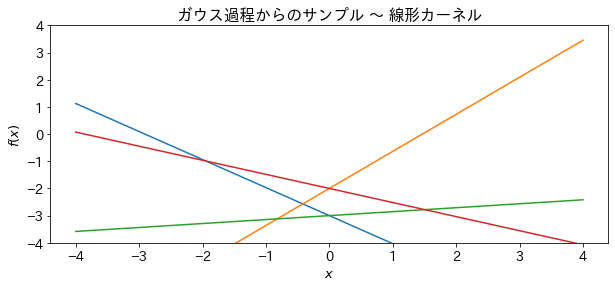

In [7]:
plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    mu = np.zeros(n_samples) + np.random.randint(-3,3) # 平均0でない
    sigma = linear_kernel(X,X)
    ys = np.random.multivariate_normal(mean=mu, cov=sigma)
    plt.plot(X, ys)
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 線形カーネル');plt.ylim(-4,4);

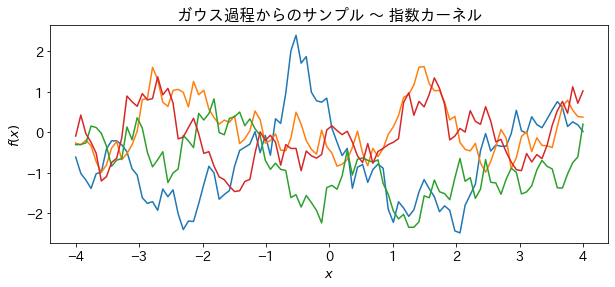

In [8]:
mu = np.zeros(n_samples)
sigma = exponential_kernel(X,X)
ys = np.random.multivariate_normal(mean=mu, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 指数カーネル');

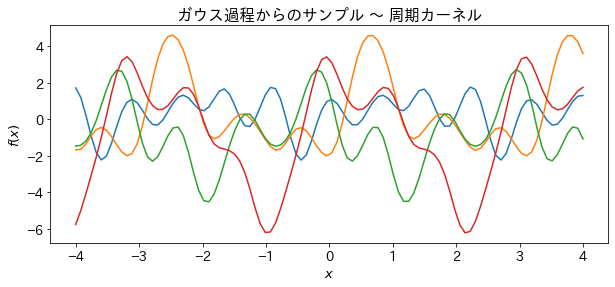

In [9]:
mu = np.zeros(n_samples)
sigma = periodic_kernel(X,X,theta1=2,theta2=.5)
ys = np.random.multivariate_normal(mean=mu, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル');

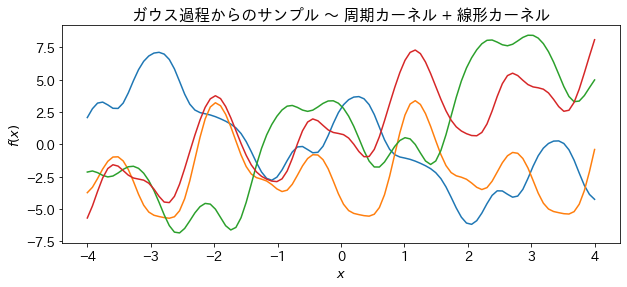

In [10]:
mu = np.zeros(n_samples)
sigma = periodic_kernel(X,X,theta1=2,theta2=.5) + linear_kernel(X,X)
ys = np.random.multivariate_normal(mean=mu, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル + 線形カーネル');

In [0]:
@deco
def matern_kernel(x,x_,nu,theta=1):
    r = abs(x-x_)
    if nu==0.5:
        return np.exp(-r/theta)
    elif nu==1.5:
        s = np.sqrt(3)*r/theta
        return (1+s)*np.exp(-s)
    elif nu==2.5:
        s = np.sqrt(5)*r/theta
        return (1+s+s**2/3)*np.exp(-s)
    elif nu==np.inf:
        return np.exp(-r**2/(2*theta**2))
    else:
        from scipy.special import gamma,kv
        if r==0:
            r = np.finfo(float).eps
        #r==0だとsも0になり、kvでnanになるため　
        #reference : https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/gaussian_process/kernels.py#L1327
        s = np.sqrt(2*nu)*r/theta
        return 2**(1-nu)/gamma(nu) * s**nu * kv(nu,s)

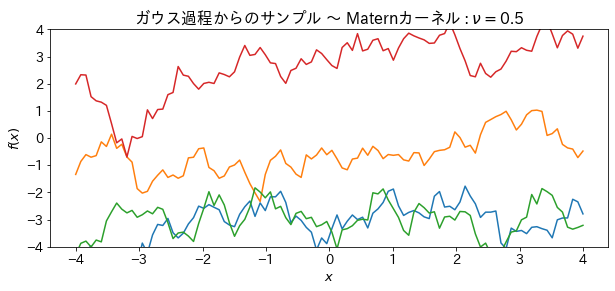

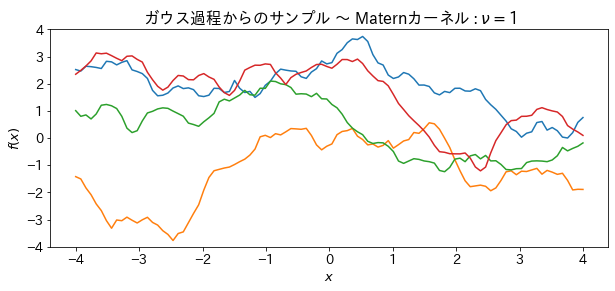

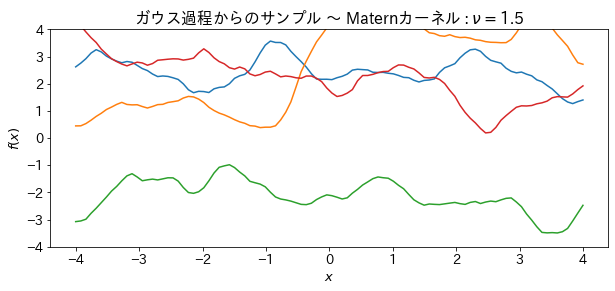

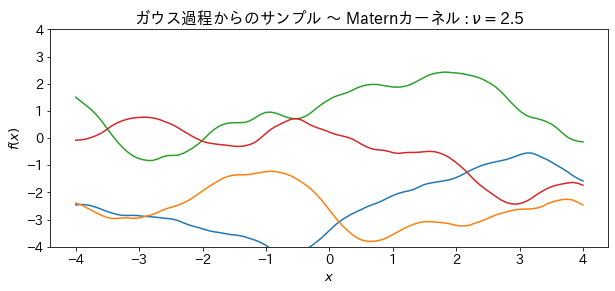

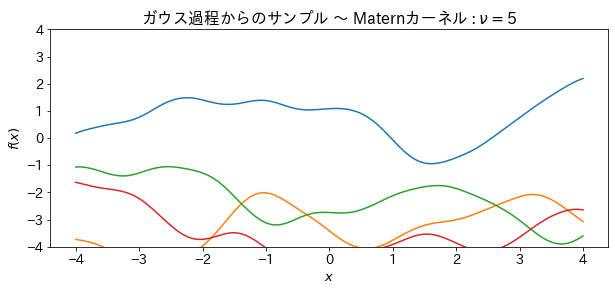

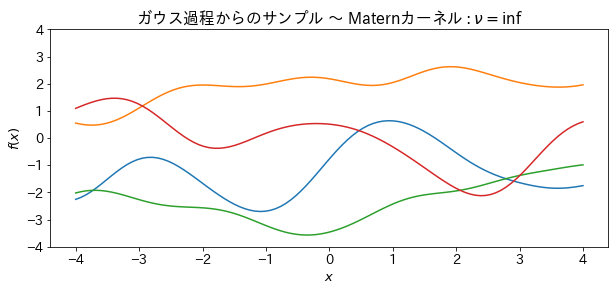

In [12]:
for nu in [.5,1,1.5,2.5,5,np.inf]:
    plt.figure(figsize=(10, 4))
    for i in range(number_of_functions):
        mu = np.zeros(n_samples) + np.random.randint(-3,3)
        sigma = matern_kernel(X,X,nu=nu)
        ys = np.random.multivariate_normal(mean=mu, cov=sigma)
        plt.plot(X, ys)
    plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title(r'ガウス過程からのサンプル ～ Maternカーネル$:\nu=${}'.format(nu));plt.ylim(-4,4);

### 3.3.3 with観測ノイズ

In [0]:
def deco_with_noise(sigma=.3):
    def _wrapper(kernel):
        def wrapper(X,X_,**kwargs):
            return np.array([[kernel(x,x_,**kwargs) + (sigma if i==j else 0) for j,x_ in enumerate(X_)] for i,x in enumerate(X)])
        return wrapper
    return _wrapper

@deco_with_noise(sigma=.1)
def gaussian_kernel_noise(x,x_,theta1=1,theta2=0.4):
    return theta1*np.exp(-abs(x-x_)**2/theta2)
@deco_with_noise(sigma=.3)
def linear_kernel_noise(x,x_):
    return x*x_
@deco_with_noise(sigma=.3)
def exponential_kernel_noise(x,x_,theta=1):
    return np.exp(-abs(x-x_)/theta)
@deco_with_noise(sigma=.1)
def periodic_kernel_noise(x,x_,theta1=1,theta2=1):
    return np.exp(theta1*np.cos(abs(x-x_)/theta2))

@deco_with_noise(sigma=.1)
def matern_kernel_noise(x,x_,nu,theta=1):
    r = abs(x-x_)
    if nu==0.5:
        return np.exp(-r/theta)
    elif nu==1.5:
        s = np.sqrt(3)*r/theta
        return (1+s)*np.exp(-s)
    elif nu==2.5:
        s = np.sqrt(5)*r/theta
        return (1+s+s**2/3)*np.exp(-s)
    elif nu==np.inf:
        return np.exp(-r**2/(2*theta**2))
    else:
        from scipy.special import gamma,kv
        if r==0:
            r = np.finfo(float).eps
        #r==0だとsも0になり、kvでnanになるため　
        #reference : https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/gaussian_process/kernels.py#L1327
        s = np.sqrt(2*nu)*r/theta
        return 2**(1-nu)/gamma(nu) * s**nu * kv(nu,s)

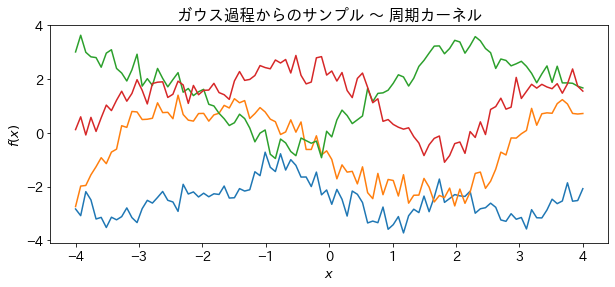

In [14]:
mu = np.zeros(n_samples)
sigma = periodic_kernel_noise(X,X)
ys = np.random.multivariate_normal(mean=mu, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル');

## 3.4 ガウス過程回帰

__モチベーション:__  
データのペア$y=(y_1,...,y_N),x=(x_1,...,x_N)$から  
$K_{nn}=kernel(x_n,x_n)$を求め、  
$y \sim \mathcal{N}(0,K)$に従うガウス過程を求めることはできた。  
しかしデータに含まれない$x^*$での$y^*$の値を求めたい。
* 線形モデルでは$y^*=w^T\phi(x^*)$として予測することができた。
* しかし、ガウス過程では$w$が積分消去されているので存在しない。

そこで、  
* $y^\prime=(y_1,...,y_N,y^*)$
* $x^\prime=(x_1,...,x_N,x^*)$とし、
* $K^\prime_{nn}=kernel(x_n,x^\prime_n)$とすると、

これらもまたガウス分布に従うので  
$y^\prime \sim \mathcal{N}(0,K^\prime)$が成り立つ。

$ \begin{pmatrix}  y\\ y^* \end{pmatrix}  \sim  \mathcal{N} \left( 0,   \begin{pmatrix}  K & k_* \\ k_*^T &k_{**} \end{pmatrix}  \right) $


(公式2.4)(=2.54)を用いると以下であることがわかる  
$ p(y^* |x^* , X) =\mathcal{N}( k_*^T K^{-1} y, k_{**}–k_*^T K^{-1} k_*)$

### 3.4.2 ガウス過程回帰の計算

$\mu=k_*^T K^{-1} y$  
$\sigma=k_{**}–k_*^T K^{-1} k_*$  
逆行列$K^{-1}$の計算は$O(N^3)$とつらい。5章で計算量削減の話あり

In [0]:
def GP(X,Y,xstar,kernel):
    K = kernel(X,X)
    k_star = kernel(X,xstar)
    k_ss = kernel(xstar,xstar)
    solved = k_star.T @ np.linalg.inv(K)
    mu = solved @ Y
    sigma = k_ss - (solved @ k_star)
    return mu, sigma

ガウスカーネルの効率的な計算
+ 計算合わない

In [0]:
X1 = np.random.uniform(-5,5, size=100)
from numpy.matlib import repmat
def gaussian_kernel_efficient(X,lmd=0.4,tau=1,eta=0.1):
    N = len(X)
    z = np.sum(X**2)
    K = repmat(z.T,1,N) + repmat(z,N,1) - 2*(X.T@X)
    K = tau * np.exp(-lmd*K) + eta * np.eye(N)
    return K

In [17]:
%%time
x1 = gaussian_kernel_noise(X1,X1,theta1=1,theta2=0.4)

CPU times: user 39.7 ms, sys: 0 ns, total: 39.7 ms
Wall time: 40.4 ms


In [18]:
%%time
x2 = gaussian_kernel_efficient(X1)

CPU times: user 1.04 ms, sys: 13 µs, total: 1.05 ms
Wall time: 1.06 ms


In [19]:
(x1 == x2).all()

False

/ガウスカーネルの効率的な計算

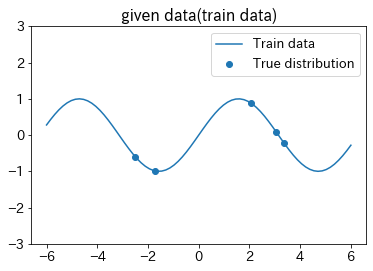

In [20]:
# prepare data
domain = (-6, 6)
## prepare train data x from random, y from sin(x)
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=5)
y1 = np.sin(X1)
## test data
X2 = np.linspace(domain[0], domain[1], 75)
## plot data
plt.plot(X2,np.sin(X2),label='Train data')
plt.scatter(X1,y1, label='True distribution')
plt.ylim(-3,3);plt.legend()
plt.title('given data(train data)');

In [0]:
def plot_kernel(kernel,title):
    mu, SIGMA = GP(X1, y1, X2, kernel)
    sigma = np.sqrt(np.diag(SIGMA))
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5),sharey=True)
    # Plot distribution of posterior and prior
    ax1.set_ylim(-3,3)
    ax1.plot(X2, np.sin(X2), 'b--', label='$sin(x)$')
    ax1.fill_between(X2, mu-2*sigma, mu+2*sigma, color='red', alpha=0.1, label='$2 \sigma_{2|1}$')
    ax1.plot(X2, mu, 'r-', lw=2, label='$\mu_{2|1}$')
    ax1.plot(X1, y1, 'ko', linewidth=2, label='$train~data$')
    ax1.set_title(title);ax1.legend()
    # Plot some samples from this function
    y2 = np.random.multivariate_normal(mean=mu, cov=SIGMA, size=5)
    ax2.plot(X2, y2.T, '-')
    ax2.set_title('5 samples from prior');

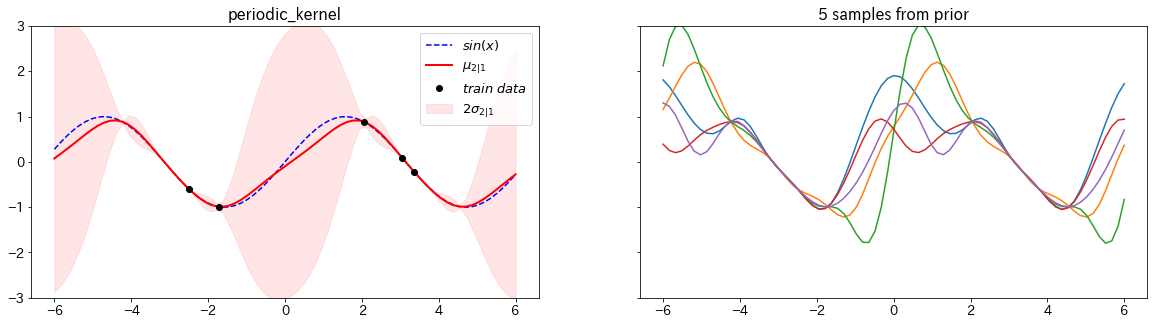

In [22]:
plot_kernel(periodic_kernel, 'periodic_kernel')

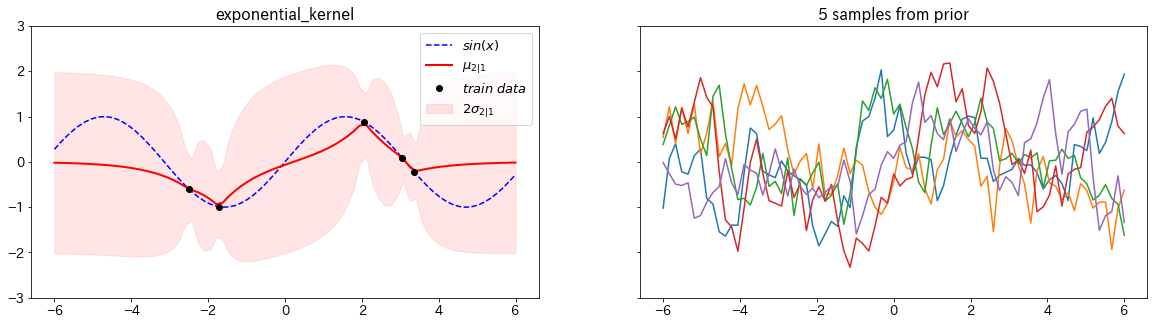

In [23]:
plot_kernel(exponential_kernel, 'exponential_kernel')

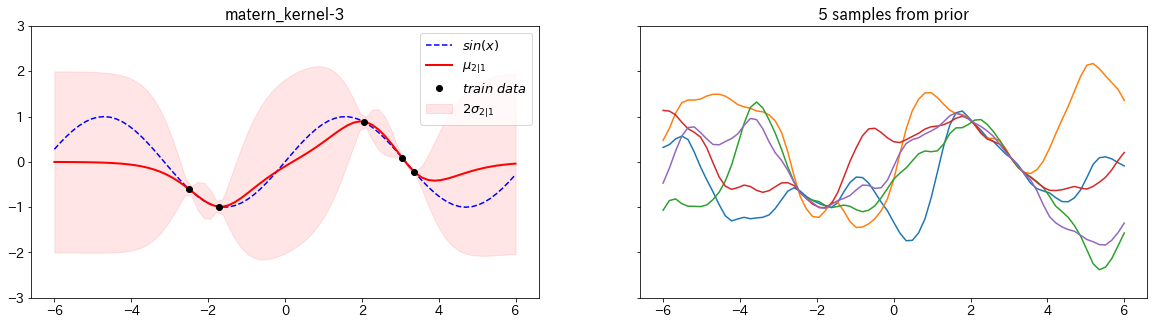

In [24]:
plot_kernel(lambda x,x_:matern_kernel(x,x_,nu=3), 'matern_kernel-3')

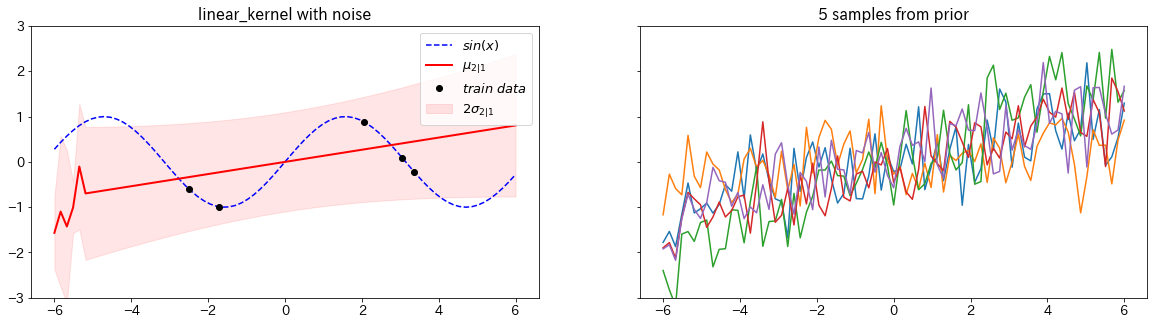

In [25]:
plot_kernel(linear_kernel_noise,'linear_kernel with noise')

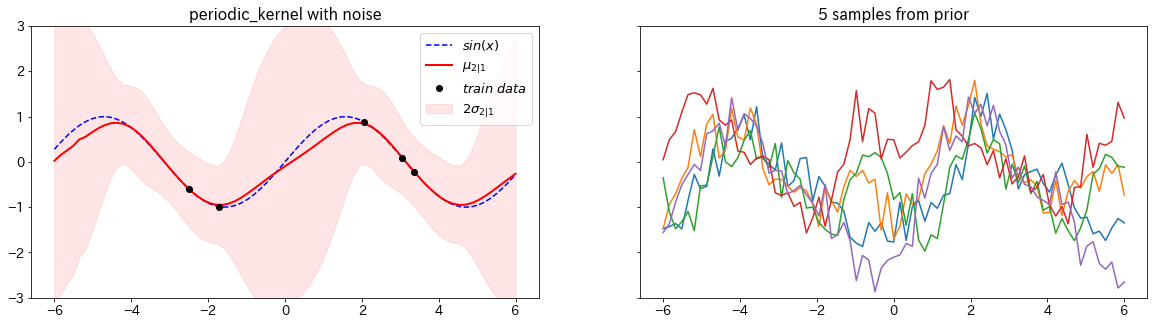

In [26]:
plot_kernel(periodic_kernel_noise, 'periodic_kernel with noise')

Text(0.5, 1.0, 'given data with noise')

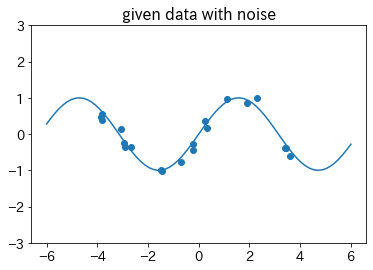

In [27]:
# prepare data
domain = (-6, 6)
## prepare train data x from random, y from sin(x)
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=20)
noise =  np.random.rand(len(X1))/2-.25
y1 = np.sin(X1) + noise
## test data
X2 = np.linspace(domain[0], domain[1], 75)
## plot data
plt.plot(X2,np.sin(X2))
plt.scatter(X1,y1)
plt.ylim(-3,3)
plt.title('given data with noise')

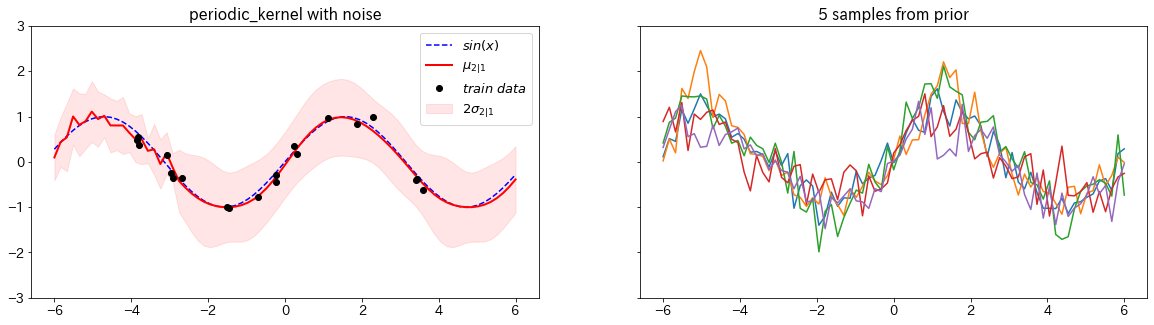

In [28]:
plot_kernel(periodic_kernel_noise, 'periodic_kernel with noise')

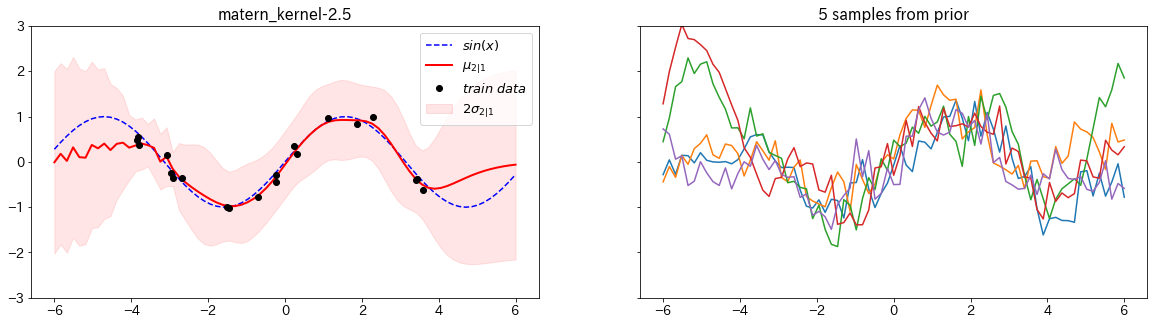

In [29]:
plot_kernel(lambda x,x_:matern_kernel_noise(x,x_,nu=2.5), 'matern_kernel-2.5')

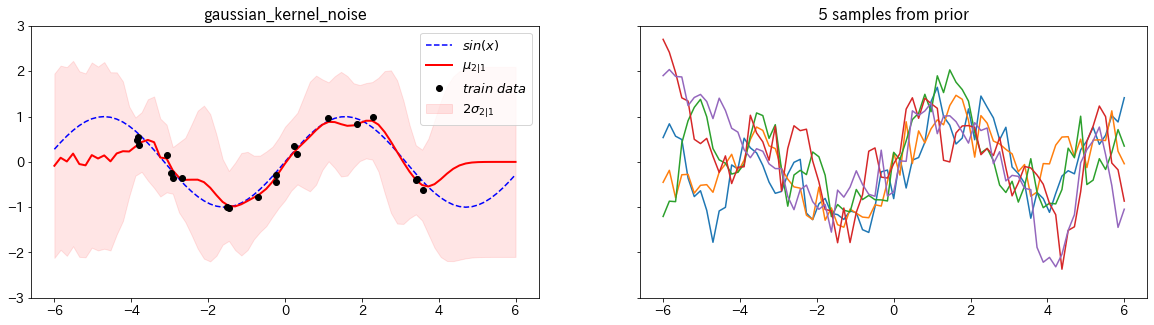

In [30]:
plot_kernel(gaussian_kernel_noise, 'gaussian_kernel_noise')

### 3.4.3 ガウス過程回帰の要素表現

yの予測の期待値の式(3.75)

$E[y^*|x^*, D]=k^T_*K^{-1}y$

## 3.5 ガウス過程回帰のハイパーパラメータ推定

例えばガウスカーネルでは3つのハイパーパラメータがある。

$kernel(x,x^\prime|\theta)=\theta_1\exp(-|x-x^\prime|^2/\theta_2) + \theta_3\delta(x,x^\prime)$

カーネルは$\theta$に依存し、カーネルから計算されるカーネル行列$K$も$\theta$に依存している。

$p(y|X,\theta)\propto -\log|K_\theta|-y^TK^{-1}_\theta y+const.$

$L=-\log|K_\theta|-y^TK^{-1}_\theta y$

Lを最大化するようにMCMC, あるいは勾配法でハイパーパラメータ$\theta$を推定することができる。

Lをハイパーパラメータ$\theta$で微分すると

$\frac{\partial L}{\partial \theta} = – tr(\boldsymbol K_{\theta}^{-1} \frac{\partial \boldsymbol K_{\theta}}{\partial \theta}) + (\boldsymbol K_{\theta}^{-1}\boldsymbol y)^T \frac{\partial \boldsymbol K_{\theta}}{\partial \theta}(\boldsymbol K_{\theta}^{-1} \boldsymbol y)$


L-BFGS法とは
http://kotarotanahashi.github.io/blog/2015/10/03/l-bfgsfalseshi-zu-mi/

よんだけどよくわからない

### 確率的勾配法で実装する

$\theta_{new} = \theta + \eta \frac{\partial L}{\partial \theta}$

In [0]:
# reference:https://leck-tech.com/machine-learning/gaussian-process-regression
def part_k(x,x_,n,n_):
    '''
    input :np.array(1)
    return:np.array(3,)
    '''
    dk = np.zeros(3)
    dk[0] = gaussian_kernel(x,x_,theta[0],theta[1])-theta[2]*(n==n_)
    dk[1] = dk[0]*(-theta[1])*abs(x-x_)**2
    dk[2] = theta[2]*(n==n_)
    return dk

def part_K(X):
    '''
    input :np.array([N,N])
    return:np.array([3,N,N])
    '''
    N = X.shape[0]
    dK = np.zeros([N,N,3])
    for i in range(N):
        for j in range(N):
            dK[i,j] = part_k(X[i,j],X[i,j],i,j)
    return dK.transpose(2,0,1)

def gradient_L(K,y):
    '''
    input :np.array([N,N])
    return:np.array(3,)
    '''
    K_inv = np.linalg.inv(K)
    dK_dtheta = part_K(K)
    Kinv_y = K_inv@y
    return -np.trace((K_inv@dK_dtheta),axis1=1,axis2=2) + Kinv_y.T @ dK_dtheta @ Kinv_y

# decoないバージョン thetaをすべてパラメータ化
def gaussian_kernel_noise(X,X_,theta1=.5,theta2=.5,theta3=.5):
    r = np.zeros([len(X),len(X_)])
    for i,x in enumerate(X):
        for j,x_ in enumerate(X_):
            r[i,j] = gaussian_kernel(x,x_,theta1,theta2) + theta3*(i==j)
    return r

In [431]:
theta = [.5,.5,.5]

for _ in range(100):
    K = gaussian_kernel_noise(X1,X1,*theta)
    theta += gradient_L(K,y1)*.0005
theta

array([0.6893, 0.5   , 0.0214])

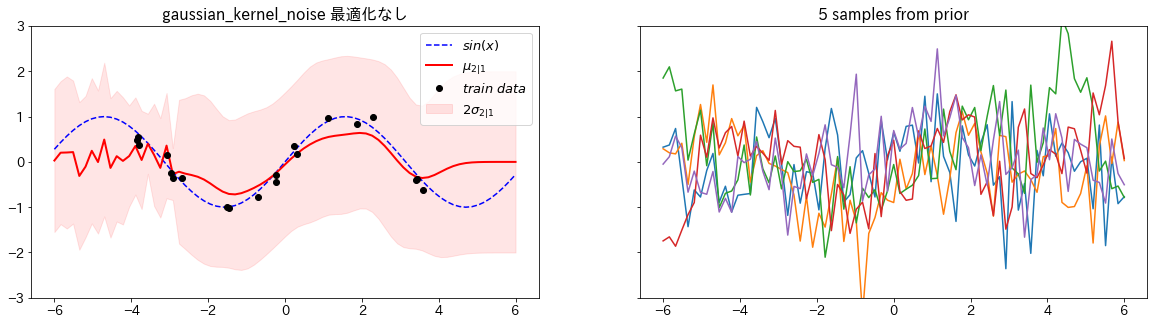

In [432]:
plot_kernel(gaussian_kernel_noise,'gaussian_kernel_noise 最適化なし')

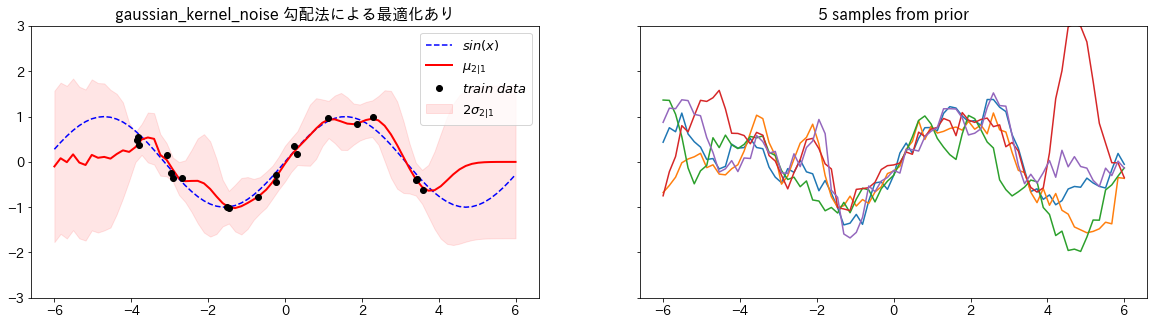

In [433]:
plot_kernel(lambda x,x_:gaussian_kernel_noise(x,x_,*theta),'gaussian_kernel_noise 勾配法による最適化あり')

### MCMC
MCMCでハイパラ最適化やってるhttps://qiita.com/phyblas/items/d756803ec932ab621c56

MCMCの例:以下のfunctionで一番高いx,yを探す

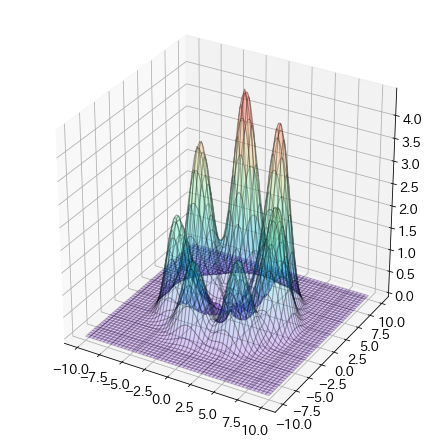

In [279]:
from mpl_toolkits.mplot3d import Axes3D

def fn(x,y):
    return np.exp(-(5**2-(x**2+y**2))**2/250 + y/10) * (7./4-np.sin(7*np.arctan2(x,y)))

plt.figure(figsize=[6,6])
mx,my = np.meshgrid(np.linspace(-10,10,101),np.linspace(-10,10,101))
mz = fn(mx,my)
ax = plt.axes([0,0,1,1],projection='3d')
ax.plot_surface(mx,my,mz,rstride=2,cstride=2,alpha=0.2,edgecolor='k',cmap='rainbow')
plt.show()

In [0]:
def mcmc(f,bound, n_iter,history=False):
    '''
    f      : function
    bound  : fの探索範囲 array[[min1,max1],[min2,max2],...]
    n_iter : 何回探索するか
    history: 履歴を返すか、最適なもののみ返すか
    '''
    theta0 = bound.mean(axis=1) # 初期値をboundの中央に設定
    p0 = f(*theta0)
    p,theta = [p0],[theta0]
    for _ in tqdm_notebook(range(n_iter)):
        theta1 = np.random.uniform(bound[:,0],bound[:,1]) #boundの中から一様分布で新しい位置を作成
        p1 = f(*theta1) # 新しい位置の確率
        r = p1/p0        # 新しい位置と現在の位置の確率の比率
        if(r>1 or r>np.random.random()): # 比率は1より高い場合は常に移動するが、低い場合は確率で移動する
            theta0,p0 = theta1,p1 
            theta.append(theta0)
            p.append(p0)
    if history:
        return np.stack(theta).T, np.array(p)
    else:
        return theta[np.array(p).argmax()]

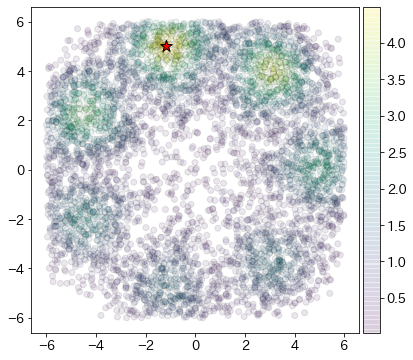

In [362]:
bound = np.array([[-6,6],[-6,6]])
theta,prob = mcmc(fn,bound,n_iter=10000, history=True)

plt.figure(figsize=[7,6])
plt.scatter(*theta,c=prob,alpha=0.1,edgecolor='k')
plt.colorbar(pad=0.01)
plt.scatter(*theta[:,np.argmax(prob)],s=150,c='r',marker='*',edgecolor='k')

In [407]:
theta.shape, prob.shape

((3, 872), (872,))

$L=-\log|K_\theta|-y^TK^{-1}_\theta y$

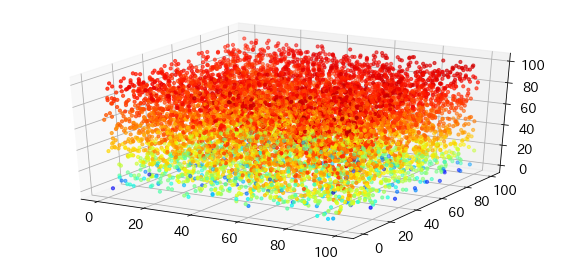

In [422]:
def log_likelihood(K_theta,y):
    return -np.linalg.slogdet(K_theta)[1] - y.T @ np.linalg.inv(K_theta) @ y

def f(t1,t2,t3):
    K = gaussian_kernel_noise(X1,X1,t1,t2,t3)
    return log_likelihood(K,y1)

bound = np.array([[1e-2,1e2],[1e-2,1e2],[1e-2,1e2]])

theta,prob = mcmc(f, bound, n_iter=10000,history=True)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211 , projection='3d')
sc = ax1.scatter(theta[0], theta[1], zs=theta[2],zdir='z', s=10,c=-prob, cmap=plt.cm.jet) 

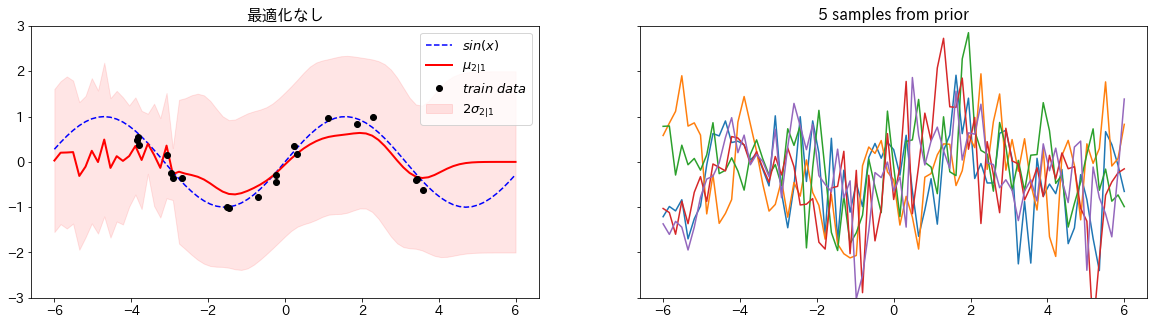

In [423]:
kernel = lambda x,x_: gaussian_kernel_noise(x,x_,*[.5,.5,.5])
plot_kernel(kernel,'最適化なし')

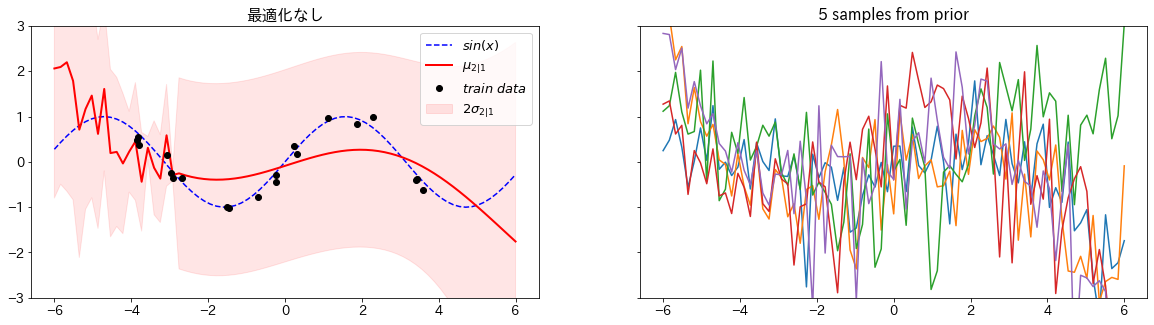

In [424]:
kernel = lambda x,x_: gaussian_kernel_noise(x,x_,*[43,52,1])
plot_kernel(kernel,'最適化なし')